<a href="https://colab.research.google.com/github/tongnamuu/Tensorflow_Tutorials/blob/master/Tensorflow_tutorials_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [0]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(128,activation='relu'),
                        keras.layers.Dense(10,activation='softmax')
])


In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 78us/sample - loss: 3.8625 - accuracy: 0.6888
Epoch 2/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.6991 - accuracy: 0.7347
Epoch 3/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.5797 - accuracy: 0.7881
Epoch 4/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.5210 - accuracy: 0.8217
Epoch 5/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.4960 - accuracy: 0.8337
Epoch 6/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.4811 - accuracy: 0.8391
Epoch 7/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.4766 - accuracy: 0.8403
Epoch 8/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.4628 - accuracy: 0.8450
Epoch 9/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.4588 - accuracy: 0.8461
Epoch 10/10
60

In [0]:
test_loss, test_acc = model.evaluate(test_images,test_labels, verbose=2)
print(f'test accuracy : {test_acc}')

10000/10000 - 0s - loss: 0.5258 - accuracy: 0.8377
test accuracy : 0.8377000093460083


In [0]:
predictions = model.predict(test_images)

In [0]:
predictions[0]

array([6.6734073e-19, 1.4246537e-13, 0.0000000e+00, 2.6178874e-16,
       7.7511025e-33, 1.8479090e-02, 2.7776215e-23, 1.3880973e-01,
       6.5096301e-13, 8.4271115e-01], dtype=float32)

In [0]:
np.argmax(predictions[0])

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i],true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img,cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

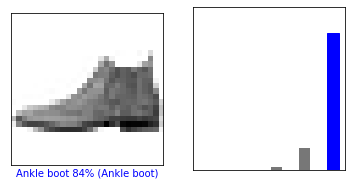

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

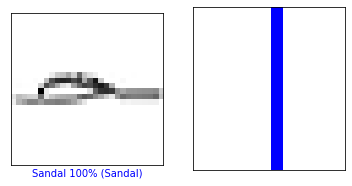

In [0]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

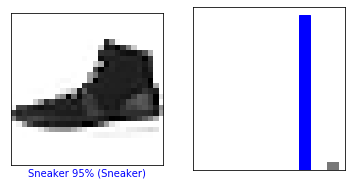

In [0]:
i = 43
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

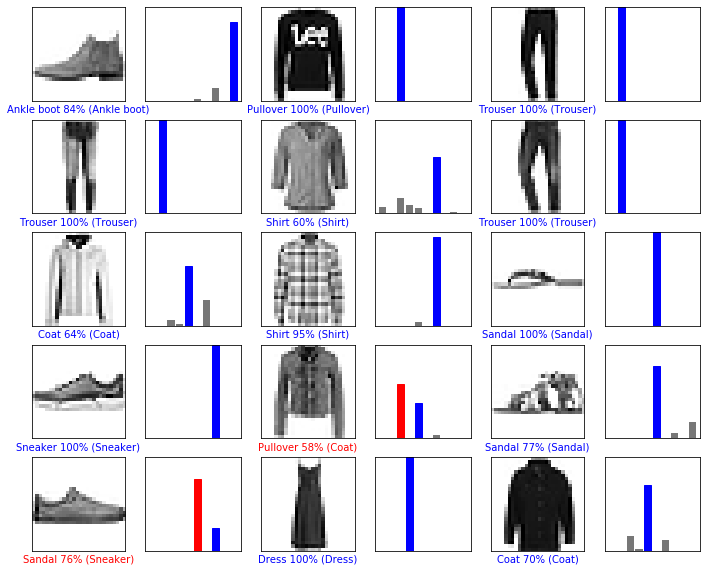

In [0]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i,predictions, test_labels, test_images)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [0]:
img = test_images[13]
print(img.shape)

(28, 28)


In [0]:
img = np.expand_dims(img,0)
print(img.shape)

(1, 28, 28)


In [0]:
predictions_single = model.predict(img)
print(predictions_single)

[[2.2690294e-05 3.2372557e-04 5.6090875e-07 9.9958771e-01 6.1831030e-05
  1.5141544e-35 1.3238759e-06 0.0000000e+00 2.1257081e-06 1.7038773e-35]]


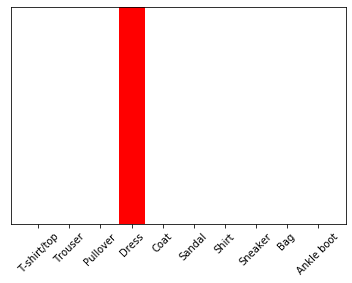

In [0]:
plot_value_array(0,predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [0]:
np.argmax(predictions_single[0])

3